In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

In [2]:
dataset = pd.read_csv('/Users/vladpivovarov/Documents/Python/Udemy-2/5.Data/P39-Minimizing-Churn-Data/churn_data.csv')

In [3]:
#1.Check Data
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [5]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
user                       27000 non-null int64
churn                      27000 non-null int64
age                        26996 non-null float64
housing                    27000 non-null object
credit_score               18969 non-null float64
deposits                   27000 non-null int64
withdrawal                 27000 non-null int64
purchases_partners         27000 non-null int64
purchases                  27000 non-null int64
cc_taken                   27000 non-null int64
cc_recommended             27000 non-null int64
cc_disliked                27000 non-null int64
cc_liked                   27000 non-null int64
cc_application_begin       27000 non-null int64
app_downloaded             27000 non-null int64
web_user                   27000 non-null int64
app_web_user               27000 non-null int64
ios_user                   27000 non-null int64
android_user          

In [7]:
#2. Remove NaN

In [8]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [9]:
dataset = dataset[pd.notnull(dataset['age'])]
dataset = dataset.drop(columns = ['credit_score','rewards_earned'])

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26996 entries, 0 to 26999
Data columns (total 29 columns):
user                       26996 non-null int64
churn                      26996 non-null int64
age                        26996 non-null float64
housing                    26996 non-null object
deposits                   26996 non-null int64
withdrawal                 26996 non-null int64
purchases_partners         26996 non-null int64
purchases                  26996 non-null int64
cc_taken                   26996 non-null int64
cc_recommended             26996 non-null int64
cc_disliked                26996 non-null int64
cc_liked                   26996 non-null int64
cc_application_begin       26996 non-null int64
app_downloaded             26996 non-null int64
web_user                   26996 non-null int64
app_web_user               26996 non-null int64
ios_user                   26996 non-null int64
android_user               26996 non-null int64
registered_phones       

In [11]:
#Features Histograms
dataset2 = dataset.drop(columns = ['user','churn'])

In [12]:
# # Needed older version of Sns
# fig = plt.figure(figsize=(15,12))
# plt.suptitle('Histogram of numerical columns', fontsize = 20)
# for i in range(1,dataset2.shape[1] + 1):
#     plt.subplot(6,5,i)
#     f = plt.gca()
#     f.axes.get_yaxis().set_visible(False)
#     f.set_title(dataset2.columns.values[i - 1])

#     vals = np.size(dataset2.iloc[:,i - 1].unique())
    
#     plt.hist(dataset2.iloc[:,i - 1], bins = vals, color = '#3F5D7D')
    
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    

In [13]:
#Pie Charts
dataset2 = dataset[['housing','is_referred','app_downloaded',
                    'web_user','app_web_user','ios_user',
                    'android_user','registered_phones','payment_type',
                    'waiting_4_loan','cancelled_loan',
                    'received_loan','rejected_loan','zodiac_sign',
                    'left_for_two_month_plus','left_for_one_month','is_referred']]

In [14]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26996 entries, 0 to 26999
Data columns (total 17 columns):
housing                    26996 non-null object
is_referred                26996 non-null int64
app_downloaded             26996 non-null int64
web_user                   26996 non-null int64
app_web_user               26996 non-null int64
ios_user                   26996 non-null int64
android_user               26996 non-null int64
registered_phones          26996 non-null int64
payment_type               26996 non-null object
waiting_4_loan             26996 non-null int64
cancelled_loan             26996 non-null int64
received_loan              26996 non-null int64
rejected_loan              26996 non-null int64
zodiac_sign                26996 non-null object
left_for_two_month_plus    26996 non-null int64
left_for_one_month         26996 non-null int64
is_referred                26996 non-null int64
dtypes: int64(14), object(3)
memory usage: 3.7+ MB


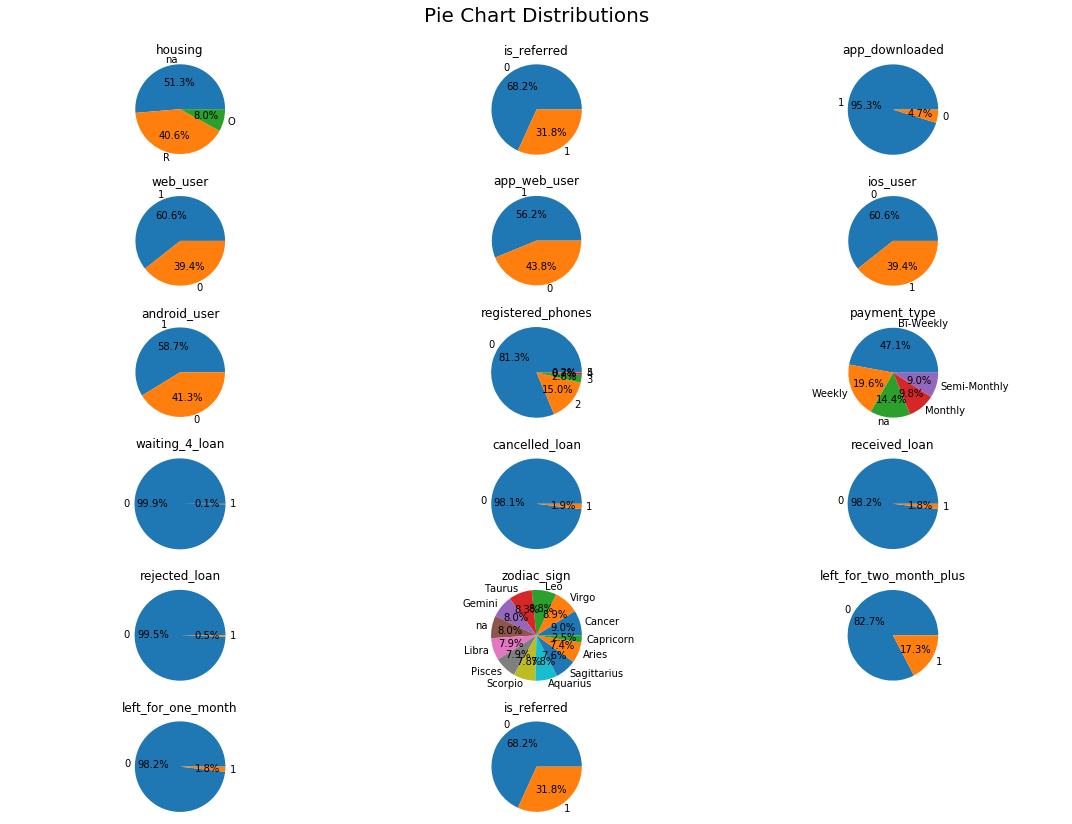

In [15]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Pie Chart Distributions', fontsize = 20)
for i in range(1,dataset2.shape[1] + 1):
    plt.subplot(6,3,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    values = dataset2.iloc[:,i-1].value_counts(normalize = True).values
    index  = dataset2.iloc[:,i-1].value_counts(normalize = True).index
    
    plt.pie(values,labels=index, autopct='%1.1f%%')
    plt.axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])



In [16]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

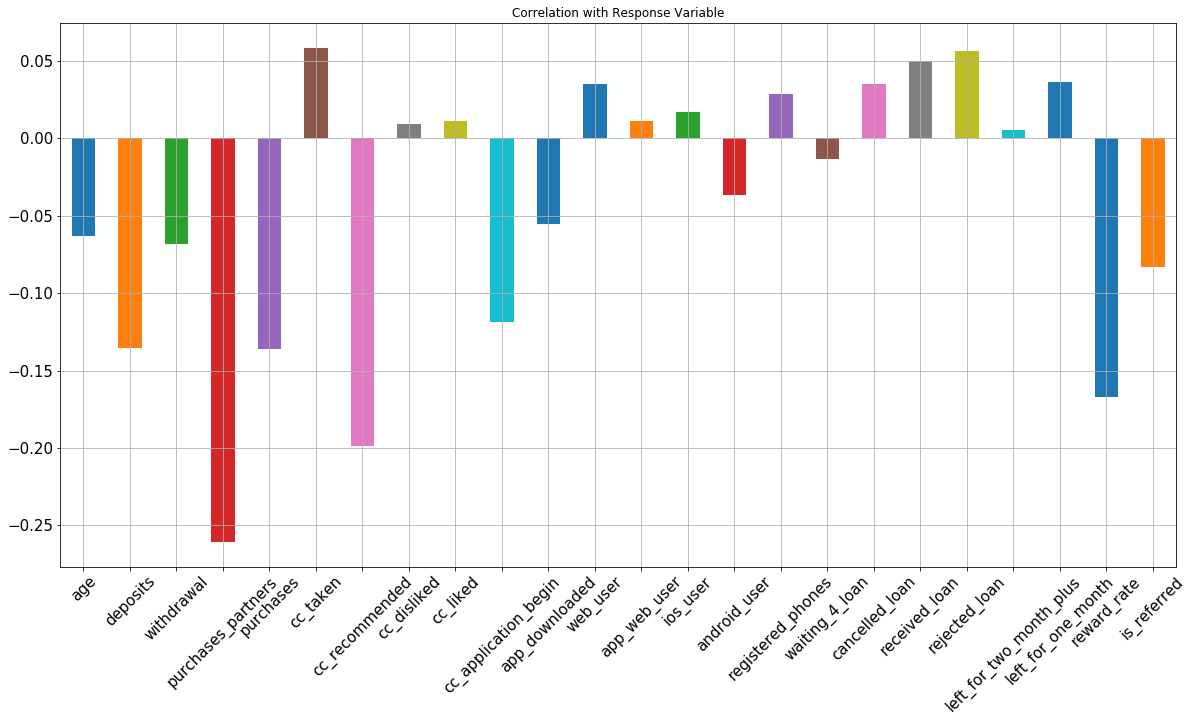

In [18]:
# Exploring Uneven Features
dataset.drop(columns = ['churn','user','housing','payment_type','zodiac_sign']).corrwith(dataset.churn).plot.bar(
figsize=(20,10), title='Correlation with Response Variable', fontsize=15,
rot=45, grid=True)


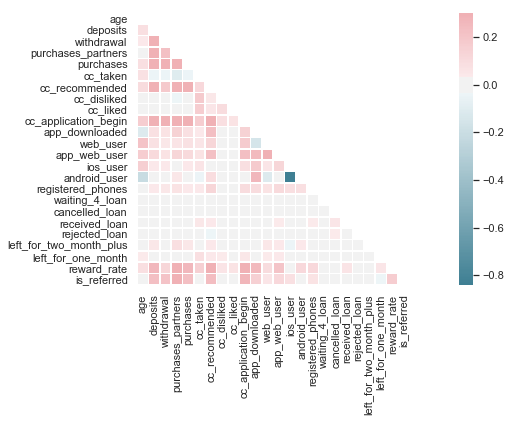

In [23]:
#Correlation Matrix
sns.set(style='white')
corr = dataset.drop(columns=['user','churn']).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(18,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5)

In [24]:
dataset = dataset.drop(columns=['app_web_user'])

In [27]:
dataset.to_csv('new_churn_data.csv',index=False)

In [29]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'ios_user', 'android_user', 'registered_phones',
       'payment_type', 'waiting_4_loan', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'zodiac_sign', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred'],
      dtype='object')

In [31]:
#One-Host Encoder

#data Preparation
user_identifier = dataset['user']
dataset = dataset.drop(columns=['user'])

In [32]:
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [33]:
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [35]:
dataset = dataset.drop(columns=['housing_na','zodiac_sign_na','payment_type_na'])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns='churn'), 
                                                    dataset['churn'], 
                                                    test_size=0.2, 
                                                    random_state=0)

In [38]:
#Balancing the Training Set
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [39]:
pos_index = y_train[y_train.values==1].index
neg_index = y_train[y_train.values==0].index

In [41]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index 
    
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.array(lower)

new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train.loc[new_indexes]

In [50]:
#Feature Scaling
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [54]:
X_test2.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
2835,-0.012925,0.879531,-0.291474,-0.607689,0.902429,1.963313,1.226480,-0.072556,-0.071605,1.822174,...,-0.312096,-0.158281,-0.295958,-0.312096,-0.296405,-0.296628,3.495008,-0.293717,-0.299742,-0.313066
21022,-0.715633,-0.359456,-0.291474,2.446277,-0.358931,-0.170541,1.691436,-0.072556,-0.071605,-0.405317,...,-0.312096,-0.158281,3.378856,-0.312096,-0.296405,-0.296628,-0.286122,-0.293717,-0.299742,-0.313066
5592,1.492880,0.879531,1.712198,-0.631736,0.902429,-0.170541,0.421313,2.778656,-0.071605,2.140387,...,-0.312096,-0.158281,-0.295958,-0.312096,-0.296405,-0.296628,-0.286122,-0.293717,3.336204,-0.313066
15773,0.087462,-0.359456,-0.291474,-0.439360,-0.358931,-0.170541,-1.007576,-0.072556,-0.071605,-0.564423,...,-0.312096,6.317858,-0.295958,-0.312096,-0.296405,-0.296628,-0.286122,-0.293717,-0.299742,-0.313066
15123,-1.016794,0.316355,-0.291474,3.143639,0.329084,-0.170541,1.725457,-0.072556,-0.071605,2.060833,...,-0.312096,-0.158281,-0.295958,3.204144,-0.296405,-0.296628,-0.286122,-0.293717,-0.299742,-0.313066


In [58]:
#Model Building

classifier = LogisticRegression(random_state=0)

In [59]:
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
y_pred = classifier.predict(X_test)

In [62]:
cm = confusion_matrix(y_test, y_pred)

In [63]:
accuracy_score(y_test, y_pred)

0.6098148148148148

In [64]:
precision_score(y_test, y_pred)

0.5199372056514914

In [65]:
recall_score(y_test, y_pred)

0.7412712623097583

In [66]:
f1_score(y_test, y_pred)

0.6111828750692009

The Data Accuracy: 0.6098


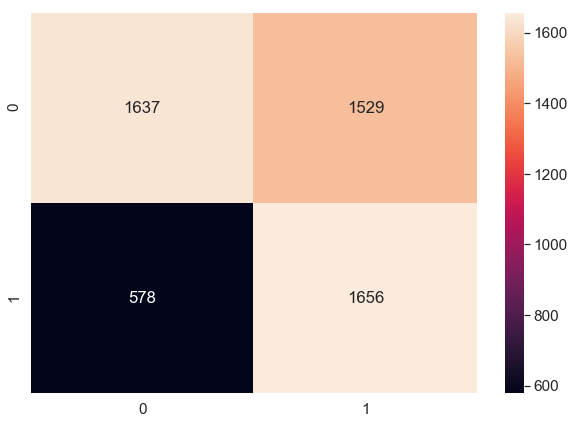

In [71]:
#Confusion Matrix
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print('The Data Accuracy: %0.4f' %accuracy_score(y_test, y_pred))

In [77]:
# Applying K-Fold Cross-Validation

accuracies = cross_val_score(estimator=classifier,
                            X = X_train,
                            y = y_train,
                            cv = 10)
accuracies

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

array([0.64597315, 0.64821029, 0.6549217 , 0.63310962, 0.61912752,
       0.65604027, 0.64541387, 0.65659955, 0.64876957, 0.6582774 ])

In [78]:
accuracies.mean()

0.6466442953020135

In [79]:
#Analysing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns=['features']),
          pd.DataFrame(np.transpose(classifier.coef_), columns=['coef'])],
         axis=1)


,features,coef
0,age,-0.015194
1,deposits,0.075979
2,withdrawal,0.066440
3,purchases_partners,-0.017267
4,purchases,-0.094506
5,cc_taken,0.150346
6,cc_recommended,0.000587
7,cc_disliked,-0.005087
8,cc_liked,0.042937
9,cc_application_begin,0.000987


In [81]:
X_train.shape

(17880, 41)

In [83]:
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [84]:
print(rfe.support_)

[False False False False  True  True False False  True False False  True
  True False  True  True  True  True  True False  True  True  True  True
 False False False False  True False False False  True  True False  True
 False False  True  True False]


In [86]:
X_train.columns[rfe.support_]

Index(['purchases', 'cc_taken', 'cc_liked', 'web_user', 'ios_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_one_month', 'reward_rate',
       'is_referred', 'housing_O', 'payment_type_Weekly',
       'zodiac_sign_Capricorn', 'zodiac_sign_Gemini', 'zodiac_sign_Libra',
       'zodiac_sign_Scorpio', 'zodiac_sign_Taurus'],
      dtype='object')

In [87]:
rfe.ranking_

array([16,  2,  5, 13,  1,  1, 22, 20,  1, 21, 15,  1,  1, 11,  1,  1,  1,
        1,  1,  8,  1,  1,  1,  1, 12, 10,  7,  9,  1,  6, 18, 19,  1,  1,
        4,  1, 14, 17,  1,  1,  3])

In [91]:
#Train model with RFE
classifier2 = LogisticRegression(random_state=0)
classifier2.fit(X_train[X_train.columns[rfe.support_]], y_train)
y_pred = classifier2.predict(X_test[X_test.columns[rfe.support_]])


cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('precision_score: ',precision_score(y_test, y_pred))
print('recall_score: ', recall_score(y_test, y_pred))
print('f1_score: ',f1_score(y_test, y_pred))

Accuracy:  0.5827777777777777
precision_score:  0.49673651666094126
recall_score:  0.6472694717994628
f1_score:  0.5620991253644314


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The Data Accuracy: 0.5828


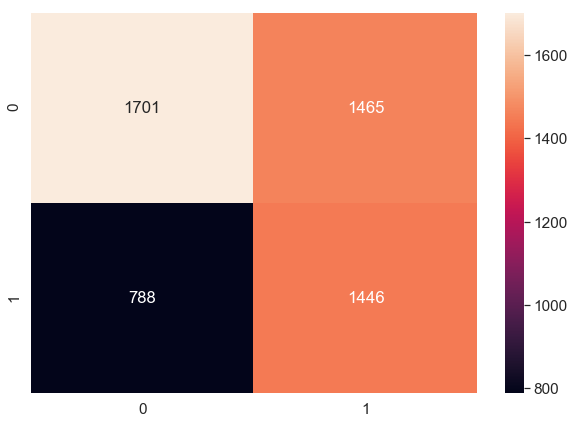

In [92]:
#Confusion Matrix
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print('The Data Accuracy: %0.4f' %accuracy_score(y_test, y_pred))

In [93]:
#Analyzing Coefficients

pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns=['features']),
          pd.DataFrame(np.transpose(classifier2.coef_), columns=['coef'])],
         axis=1)


,features,coef
0,purchases,-0.028591
1,cc_taken,0.375468
2,cc_liked,0.218283
3,web_user,0.210396
4,ios_user,0.086908
5,registered_phones,0.077981
6,waiting_4_loan,-0.786444
7,cancelled_loan,0.585684
8,received_loan,0.954574
9,rejected_loan,1.811352


In [96]:
#Formating final results

final_results = pd.concat([y_test, user_identifier], axis=1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user','churn','predicted_churn']].reset_index(drop=True) 

In [97]:
final_results

,user,churn,predicted_churn
0,61353,1.0,0
1,67679,0.0,1
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
5,28827,0.0,0
6,58305,1.0,0
7,2351,0.0,1
8,11790,0.0,1
9,46727,0.0,0
